In [1]:
pip install pystan

In [2]:
import prophet

In [3]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("/content/HDFCBANK.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-03,1015.224976,1026.099976,1003.500000,1015.575012,979.958069,7666074
1,2018-10-04,1004.000000,1008.900024,971.500000,978.875000,944.545105,8985292
2,2018-10-05,976.974976,995.000000,970.075012,982.650024,948.187744,7864590
3,2018-10-08,982.500000,984.500000,965.000000,972.500000,938.393799,10064010
4,2018-10-09,972.200012,982.500000,965.000000,970.299988,936.270813,6229682


In [6]:
df.shape

(1235, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [8]:
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
df["Date"].max()

Timestamp('2023-09-29 00:00:00')

In [10]:
df["Date"].min()

Timestamp('2018-10-03 00:00:00')

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df=df[["Date","Close"]]

In [13]:
df.head()

,Date,Close
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988


In [14]:
df["Date"].nunique()

1235

In [15]:
len(df)

1235

In [17]:
df_prophet=df.rename(columns={"Date":"ds","Close":"y"})

In [18]:
df_prophet

,ds,y
0,2018-10-03,1015.575012
1,2018-10-04,978.875000
2,2018-10-05,982.650024
3,2018-10-08,972.500000
4,2018-10-09,970.299988
...,...,...
1230,2023-09-25,1531.000000
1231,2023-09-26,1537.650024
1232,2023-09-27,1526.849976
1233,2023-09-28,1523.699951


In [19]:
from prophet import Prophet

In [21]:
m = Prophet()
model=m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/f8_eeqg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/r22mf2hw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97577', 'data', 'file=/tmp/tmpz8q1_8ke/f8_eeqg1.json', 'init=/tmp/tmpz8q1_8ke/r22mf2hw.json', 'output', 'file=/tmp/tmpz8q1_8ke/prophet_modelngpiz9z_/prophet_model-20231004125651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
# Building Time series Forecasting Model using FB Prophet model

In [24]:
# We are Predicting 6 months data

In [25]:
future_data = model.make_future_dataframe(periods=180,freq="D")

In [26]:
future_data

,ds
0,2018-10-03
1,2018-10-04
2,2018-10-05
3,2018-10-08
4,2018-10-09
...,...
1410,2024-03-23
1411,2024-03-24
1412,2024-03-25
1413,2024-03-26


In [27]:
df_prophet.shape

(1235, 2)

In [28]:
future_data.shape

(1415, 1)

In [29]:
prediction=model.predict(future_data)

In [30]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-10-03,927.497263,824.425246,962.470792,927.497263,927.497263,-33.345474,-33.345474,-33.345474,-4.178672,-4.178672,-4.178672,-29.166801,-29.166801,-29.166801,0.0,0.0,0.0,894.151789
1,2018-10-04,928.500747,827.850666,967.561760,928.500747,928.500747,-32.533264,-32.533264,-32.533264,-7.007211,-7.007211,-7.007211,-25.526053,-25.526053,-25.526053,0.0,0.0,0.0,895.967483
2,2018-10-05,929.504232,836.816101,966.925512,929.504232,929.504232,-29.772869,-29.772869,-29.772869,-7.964100,-7.964100,-7.964100,-21.808769,-21.808769,-21.808769,0.0,0.0,0.0,899.731363
3,2018-10-08,932.514686,847.253641,978.871469,932.514686,932.514686,-18.526775,-18.526775,-18.526775,-7.929985,-7.929985,-7.929985,-10.596790,-10.596790,-10.596790,0.0,0.0,0.0,913.987911
4,2018-10-09,933.518171,852.922441,991.594242,933.518171,933.518171,-11.725482,-11.725482,-11.725482,-4.752191,-4.752191,-4.752191,-6.973291,-6.973291,-6.973291,0.0,0.0,0.0,921.792689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,2024-03-23,1831.062056,1699.570435,1971.011683,1710.693424,1938.587346,12.735148,12.735148,12.735148,35.454841,35.454841,35.454841,-22.719692,-22.719692,-22.719692,0.0,0.0,0.0,1843.797205
1411,2024-03-24,1831.671993,1669.192026,1933.478059,1710.371519,1940.415646,-26.298747,-26.298747,-26.298747,-3.622681,-3.622681,-3.622681,-22.676067,-22.676067,-22.676067,0.0,0.0,0.0,1805.373246
1412,2024-03-25,1832.281930,1655.328540,1921.878752,1710.049614,1941.840330,-30.407881,-30.407881,-30.407881,-7.929985,-7.929985,-7.929985,-22.477896,-22.477896,-22.477896,0.0,0.0,0.0,1801.874049
1413,2024-03-26,1832.891867,1666.594653,1942.340265,1709.724259,1942.874874,-26.893913,-26.893913,-26.893913,-4.752191,-4.752191,-4.752191,-22.141722,-22.141722,-22.141722,0.0,0.0,0.0,1805.997954


In [31]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [32]:
prediction[['ds','yhat_lower', 'yhat_upper','yhat']].tail(180)

,ds,yhat_lower,yhat_upper,yhat
1235,2023-09-30,1640.282146,1780.823202,1719.750748
1236,2023-10-01,1618.379137,1763.128339,1684.425061
1237,2023-10-02,1612.403991,1755.941766,1684.060621
1238,2023-10-03,1622.685145,1758.453487,1691.340185
1239,2023-10-04,1629.636048,1763.275049,1696.139236
...,...,...,...,...
1410,2024-03-23,1699.570435,1971.011683,1843.797205
1411,2024-03-24,1669.192026,1933.478059,1805.373246
1412,2024-03-25,1655.328540,1921.878752,1801.874049
1413,2024-03-26,1666.594653,1942.340265,1805.997954


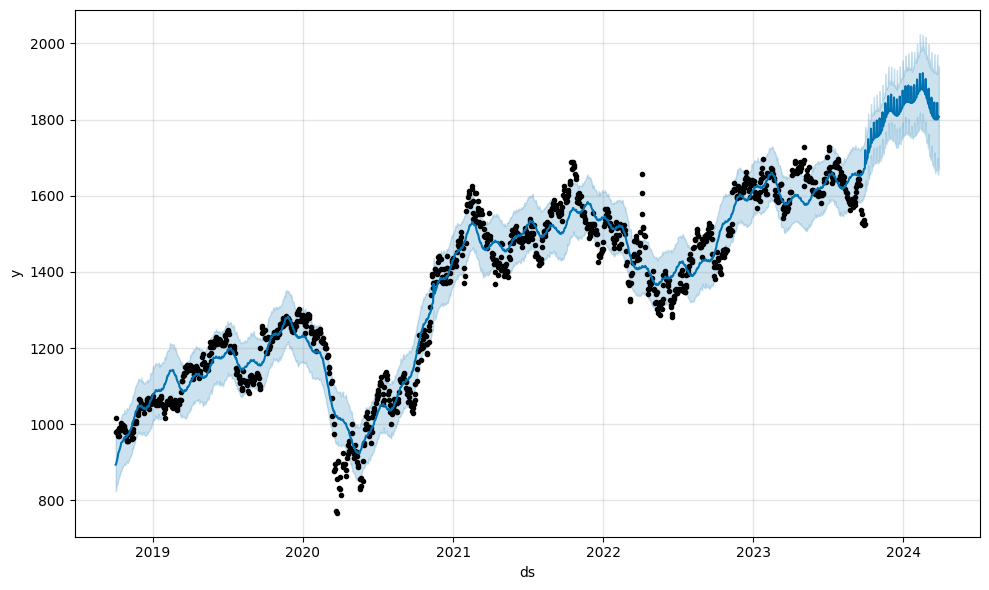

In [33]:
model.plot(prediction)
plt.show()

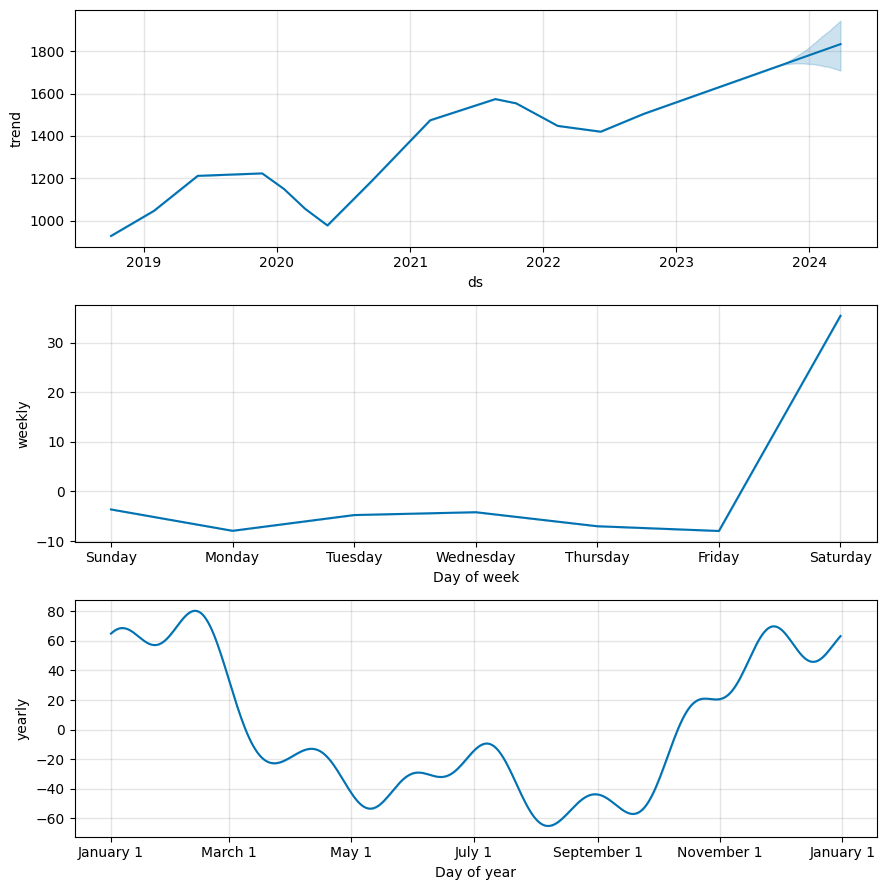

In [34]:
model.plot_components(prediction)
plt.show()

In [37]:
# Cross validation
from prophet.diagnostics import cross_validation

df_cv=cross_validation(model,horizon="30 days",period="15 days",initial="90 days")



INFO:prophet:Making 114 forecasts with cutoffs between 2019-01-08 00:00:00 and 2023-08-30 00:00:00


  0%|          | 0/114 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/wsvhp5hw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/04tgh0u7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12115', 'data', 'file=/tmp/tmpz8q1_8ke/wsvhp5hw.json', 'init=/tmp/tmpz8q1_8ke/04tgh0u7.json', 'output', 'file=/tmp/tmpz8q1_8ke/prophet_models3c2pxpg/prophet_model-20231004132930.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:29:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:29:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/4xav6qd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz8q1_8ke/y5b5qgbs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [38]:
from prophet.diagnostics import performance_metrics

In [39]:
df_performance=performance_metrics(df_cv)

In [40]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,3.685040e+03,60.704532,46.252721,0.035287,0.027190,0.035129,0.549118
1,4 days,3.763882e+03,61.350481,46.643692,0.035378,0.027190,0.035445,0.551756
2,5 days,4.484414e+03,66.965771,49.384731,0.038113,0.027190,0.038025,0.545838
3,6 days,6.177868e+03,78.599413,55.736677,0.044175,0.029002,0.043719,0.496503
4,7 days,9.211567e+03,95.976906,66.587964,0.053872,0.034382,0.053384,0.449989
5,8 days,1.143015e+04,106.911873,75.819320,0.060766,0.039690,0.061423,0.413785
6,9 days,1.341202e+04,115.810280,80.906538,0.064411,0.040101,0.066635,0.413799
7,10 days,1.512817e+04,122.996627,82.025838,0.064829,0.039286,0.069347,0.432143
8,11 days,2.615971e+04,161.739642,87.742420,0.070615,0.039151,0.075279,0.439019
9,12 days,4.585072e+04,214.127808,99.121754,0.081625,0.038789,0.086353,0.446225


In [41]:
from prophet.plot import plot_cross_validation_metric

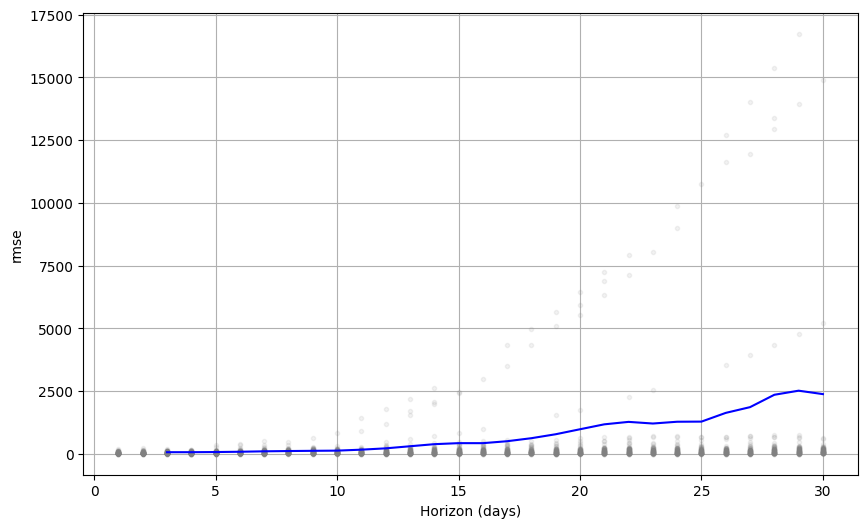

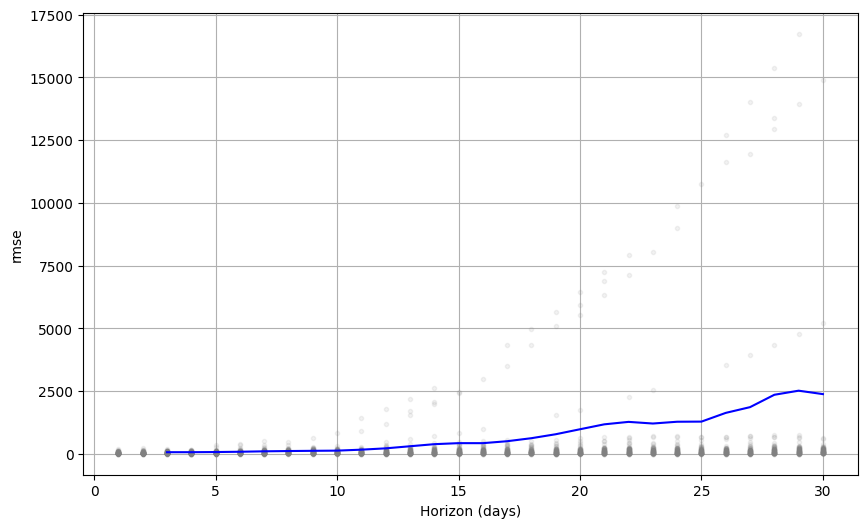

In [45]:
plot_cross_validation_metric(df_cv,metric="rmse")